In [ ]:
### Data Trnaformation
## Transforming data
## Statistical analysis

In [2]:
### Build the environment

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
%matplotlib inline

In [3]:
### Going back a lottle more than a year to account for trimming
goog = pdr.get_data_yahoo('GOOG', '20150101')

In [4]:
### To look some of the metadata we are gathering
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1573 entries, 2015-01-02 to 2021-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1573 non-null   float64
 1   Low        1573 non-null   float64
 2   Open       1573 non-null   float64
 3   Close      1573 non-null   float64
 4   Volume     1573 non-null   float64
 5   Adj Close  1573 non-null   float64
dtypes: float64(6)
memory usage: 86.0 KB


In [6]:
### We need to clean up the data a little bit, for example Adj Close is not needed it
goog.drop(columns=['Adj Close'], inplace=True)

In [9]:
### Now, in order to add more value into the data,we need to calculate the followed
## Price Change
goog["Change"] = goog.Close.diff()

## Instantaneous rate of return, is the log of the close, the difference
goog['Return'] = np.log(goog.Close).diff()

## One month of rolling standard diviation, Volatility of that 'Return' not the normal price
goog['Volatility'] = goog['Return'].rolling(21).std()

## Expected change, through the Rolling volatility as one standard diviation move: Expected Change
## Adding shift(1) at the end to avoid the noice of today's since the most recent value can't be calculated
goog['Exp Change'] = (goog.Close * goog.Volatility).shift(1)

## Compare the Exp Change with the actual price change: Mgnitude
goog["Magnitude"] = (goog.Change / goog['Exp Change'])

## Get the absolute value of Magnitude
goog["Abs Magnitude"] = np.abs(goog.Magnitude)

In [10]:
### Get rid of missing data, NaN values mainly
goog.dropna(inplace=True)
goog.head()

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Magnitude,Abs Magnitude
Date,,,,,,,,,,,
2015-02-04,531.213562,519.842773,527.790955,521.328674,1663655.0,-6.462280,-0.012320,0.017809,9.621236,-0.671668,0.671668
2015-02-05,527.052979,520.660522,522.355896,526.135498,1849765.0,4.806824,0.009178,0.016991,9.284528,0.517724,0.517724
2015-02-06,535.729126,524.968689,526.195312,529.546143,1763529.0,3.410645,0.006462,0.016986,8.939513,0.381525,0.381525
2015-02-09,530.543396,524.579773,526.554321,526.384827,1267771.0,-3.161316,-0.005988,0.017092,8.995020,-0.351452,0.351452
2015-02-10,536.227783,525.477295,527.850769,535.469849,1749891.0,9.085022,0.017112,0.017004,8.997232,1.009757,1.009757


In [11]:
### Some of the statistical analysis is to descriobe the data and look the behaviur
## WE spect the Magnitude for exaple be close to zero
goog['Magnitude'].describe()

count    1551.000000
mean        0.078438
std         1.214080
min       -11.971994
25%        -0.481486
50%         0.073474
75%         0.636158
max        12.320565
Name: Magnitude, dtype: float64

C:\Users\jusamano\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jusamano\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jusamano\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jusa

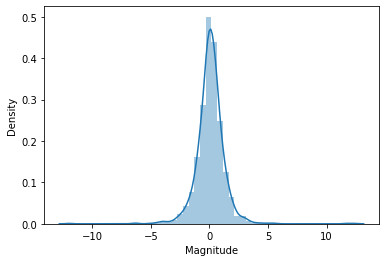

In [13]:
### If we want to have an idea in terms of graphically, we can use Matplotlib or seaborn
sns.distplot(goog['Magnitude'])

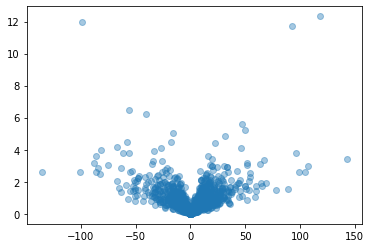

In [15]:
### Absulute change vs the actual change. By adding alpha=.4 we can add more densitu
plt.scatter(goog.Change, goog['Abs Magnitude'], alpha=.4)

### we can see outliars, we don't see that much actually

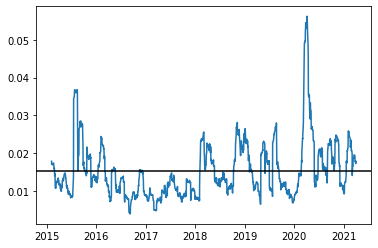

In [16]:
### We want to know what is volatily for google over this period
date = np.array(goog.index)
plt.plot(goog.Volatility)
plt.axhline(goog.Volatility.mean(), c='k')